In [1]:
# Honestly I don't know if I want all this LP packages, but... anywaysss
!pip install PyMuPDF
!pip install PyPDF2
!pip install pytesseract
!pip install pdf2image
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to us

In [2]:
import pandas as pd 
import time
from time import sleep
import pytesseract # To extract text with OCR
from datetime import date, timedelta
import os
from os import listdir
from os.path import isfile, join
from os import path
from pathlib import Path
import fitz  # PyMuPDF
from pdf2image import convert_from_path
import PyPDF2
import matplotlib.pyplot as plt
import re
import cv2
from PIL import Image

In [78]:
root = Path('/Users/saracaicedo/Library/CloudStorage/OneDrive-Universidaddelosandes/2025-1/Tesis')
root_out = root / 'input'
downloadedCR_path = root_out / "Downloaded_CR"
textCR_path = root_out / 'Text_CR'

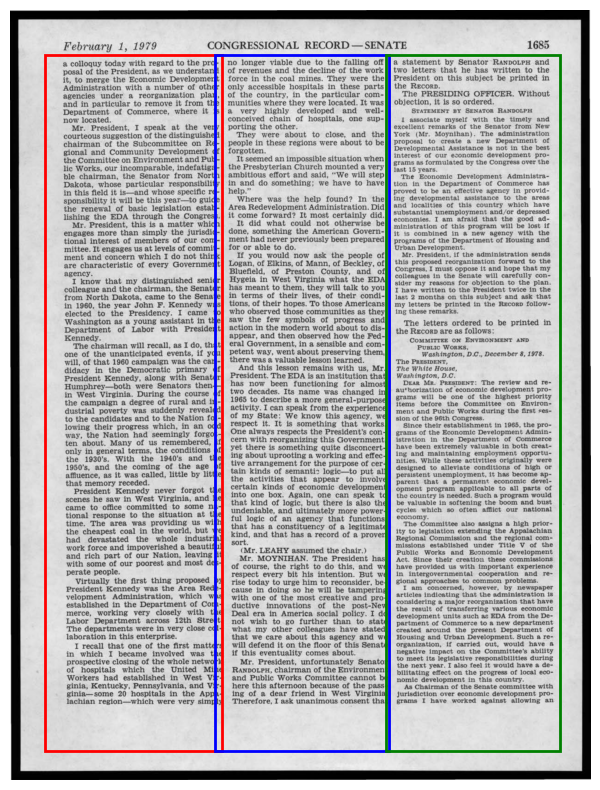

In [ ]:

pdf_path = root_out / "Downloaded_CR/01-02-1979.pdf"
 # Convert a page to an image

firstpg = 18

page_image = convert_from_path(pdf_path, first_page=firstpg, last_page=firstpg)[0]

# Define initial coordinates to test (x, y, width, height) conditional to the page
if (firstpg % 2) == 0: 
    region_of_interest_1 = (100, 130, 510, 2000)
    region_of_interest_2 = (590, 130, 500, 2000)
    region_of_interest_3 = (1080, 130, 500, 2000)
    
else:
    region_of_interest_1 = (90, 130, 495, 2000)
    region_of_interest_2 = (570, 130, 495, 2000)
    region_of_interest_3 = (1040, 130, 495, 2000)

# Draw a rectangle around the region of interest
fig, ax = plt.subplots(figsize=(8, 10))
ax.imshow(page_image, cmap='gray')

# Draw a rectangle on the image
x, y, width, height = region_of_interest_1
rect = plt.Rectangle((x, y), width, height, edgecolor='red', facecolor='none', linewidth=2)
ax.add_patch(rect)

x, y, width, height = region_of_interest_2
rect = plt.Rectangle((x, y), width, height, edgecolor='blue', facecolor='none', linewidth=2)
ax.add_patch(rect)

x, y, width, height = region_of_interest_3
rect = plt.Rectangle((x, y), width, height, edgecolor='green', facecolor='none', linewidth=2)
ax.add_patch(rect)

plt.axis('off')
plt.show()

In [81]:
# Loop through every PDF file in the downloadedCR_path folder
for pdf_file in os.listdir(downloadedCR_path):
    if pdf_file.endswith(".pdf"):
        pdf_path = os.path.join(downloadedCR_path, pdf_file)
        text_page = ""

        # Convert the PDF to images (one image per page)
        pages = convert_from_path(pdf_path)

        # Iterate through each page
        for page_num, page_image in enumerate(pages, start=1):
            # Check if there is text in the rectangle (90, 50, 150, 70)
            page_number_rect = (90, 50, 150, 70)
            cropped_page_number = page_image.crop(page_number_rect)
            page_number_text = pytesseract.image_to_string(cropped_page_number).strip()

            # Set regions of interest based on the presence of text in the rectangle
            if page_number_text:
                x_1, x_2, x_3 = 100, 590, 1080
                y, width, height = 130, 510, 2000
            else:
                x_1, x_2, x_3 = 90, 570, 1040
                y, width, height = 130, 495, 2000
            # Create the cropped column dimensions
            column1 = (x_1, y, x_1 + width, y + height)
            column2 = (x_2, y, x_2 + width, y + height)
            column3 = (x_3, y, x_3 + width, y + height)

            # Process each region of interest
            for column in [column1, column2, column3]:
                cropped_region = page_image.crop(column)

                # Perform OCR on the cropped region
                text = pytesseract.image_to_string(cropped_region)

                # Display the cropped region (optional)
                # plt.figure(figsize=(4, 2))
                # plt.imshow(cropped_region, cmap='gray')
                # plt.axis('off')
                # plt.title(f"Cropped Region - Page {page_num}")
                # plt.show()
                # print(text)

                # Append the extracted text to the text_page string
                text_page += text

        # Save the extracted text to a file in the Text_CR folder
        output_file_path = os.path.join(textCR_path, f"{os.path.splitext(pdf_file)[0]}.txt")
        with open(output_file_path, "w", encoding="utf-8") as output_file:
            output_file.write(text_page)

        print(f"Text extracted from {pdf_file} and saved to {output_file_path}")

Text extracted from 29-11-1979.pdf and saved to /Users/saracaicedo/Library/CloudStorage/OneDrive-Universidaddelosandes/2025-1/Tesis/input/Text_CR/29-11-1979.txt
Text extracted from 29-10-1979.pdf and saved to /Users/saracaicedo/Library/CloudStorage/OneDrive-Universidaddelosandes/2025-1/Tesis/input/Text_CR/29-10-1979.txt
Text extracted from 27-09-1979.pdf and saved to /Users/saracaicedo/Library/CloudStorage/OneDrive-Universidaddelosandes/2025-1/Tesis/input/Text_CR/27-09-1979.txt
Text extracted from 25-07-1979.pdf and saved to /Users/saracaicedo/Library/CloudStorage/OneDrive-Universidaddelosandes/2025-1/Tesis/input/Text_CR/25-07-1979.txt
Text extracted from 25-06-1979.pdf and saved to /Users/saracaicedo/Library/CloudStorage/OneDrive-Universidaddelosandes/2025-1/Tesis/input/Text_CR/25-06-1979.txt
Text extracted from 16-05-1979.pdf and saved to /Users/saracaicedo/Library/CloudStorage/OneDrive-Universidaddelosandes/2025-1/Tesis/input/Text_CR/16-05-1979.txt
Text extracted from 24-05-1979.pdf

KeyboardInterrupt: 